### Analyzing the Titanic data to see if there is a correlation between the chances of survival and certain characteristics of each passenger (gender, cabin class, ticket price, etc.)

In [1]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots inside jupyter notebook
%matplotlib inline

In [25]:
#2
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#3
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
missing_values=df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### The 2 missing values from the column Embarked - do not impact our analysis;
#### The 687 missing values from the column Cabin - 80% are missing , thats why we drop the column Cabin;
#### The 177 missing values from the column Age - 20% are missing and we replace them accordingly;

In [7]:
#4
df.drop(columns=['Cabin'],inplace=True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [8]:
#5 -Female
mask_f=df['Sex']=='female'
df[mask_f].isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            53
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
dtype: int64

In [9]:
median_values = df.loc[mask_f,'Age'].median()

In [10]:
df.loc[mask_f,'Age']=df.loc[mask_f,'Age'].fillna(median_values)

In [11]:
df[mask_f].isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
#6-Male
mask_m=df['Sex']=='male'
df[mask_m].isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [13]:
median_values = df.loc[mask_m,'Age'].median()

In [14]:
df.loc[mask_m,'Age']=df.loc[mask_m,'Age'].fillna(median_values)

In [15]:
df[mask_m].isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
#7 - Embarked
mask_e=df['Embarked'].value_counts().head(1).index[0]
df['Embarked'].fillna(mask_e, inplace=True)


In [17]:
# Checking if there are still missing values in DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
# Checking if there are still missing values in DataFrame
missing_values=df.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<Axes: title={'center': 'Distribution of Passengers by Gender'}>

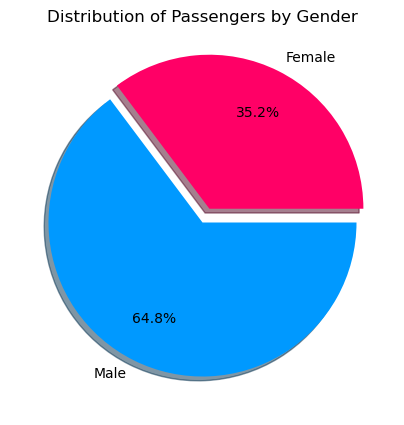

In [19]:
#8
df.groupby('Sex')['Sex'].count().plot.pie(colors=('#FF0066','#0099FF'),
                                                                 labels=('Female', 'Male'),
                                                                 autopct='%1.1f%%',
                                                                 pctdistance=0.7,
                                                                 shadow=True, 
                                                                 explode=(0.1, 0),                                         
                                                                 figsize=(5,5),
                                                                 title='Distribution of Passengers by Gender',
                                                                 ylabel=''
                                                                )

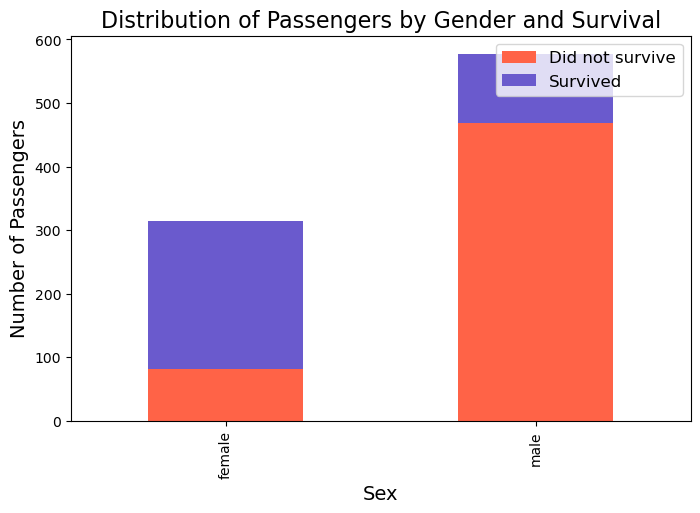

In [19]:
#9
grouped = df.groupby(['Sex', 'Survived']).size().unstack()
plot = grouped.plot(kind='bar', stacked=True, color=['#FF6347', '#6A5ACD'], figsize=(8, 5))
plot.set_xlabel('Sex', fontsize=14)
plot.set_ylabel('Number of Passengers', fontsize=14)
plot.set_title('Distribution of Passengers by Gender and Survival', fontsize=16)
plot.legend(['Did not survive', 'Survived'], loc='upper right', fontsize=12)
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


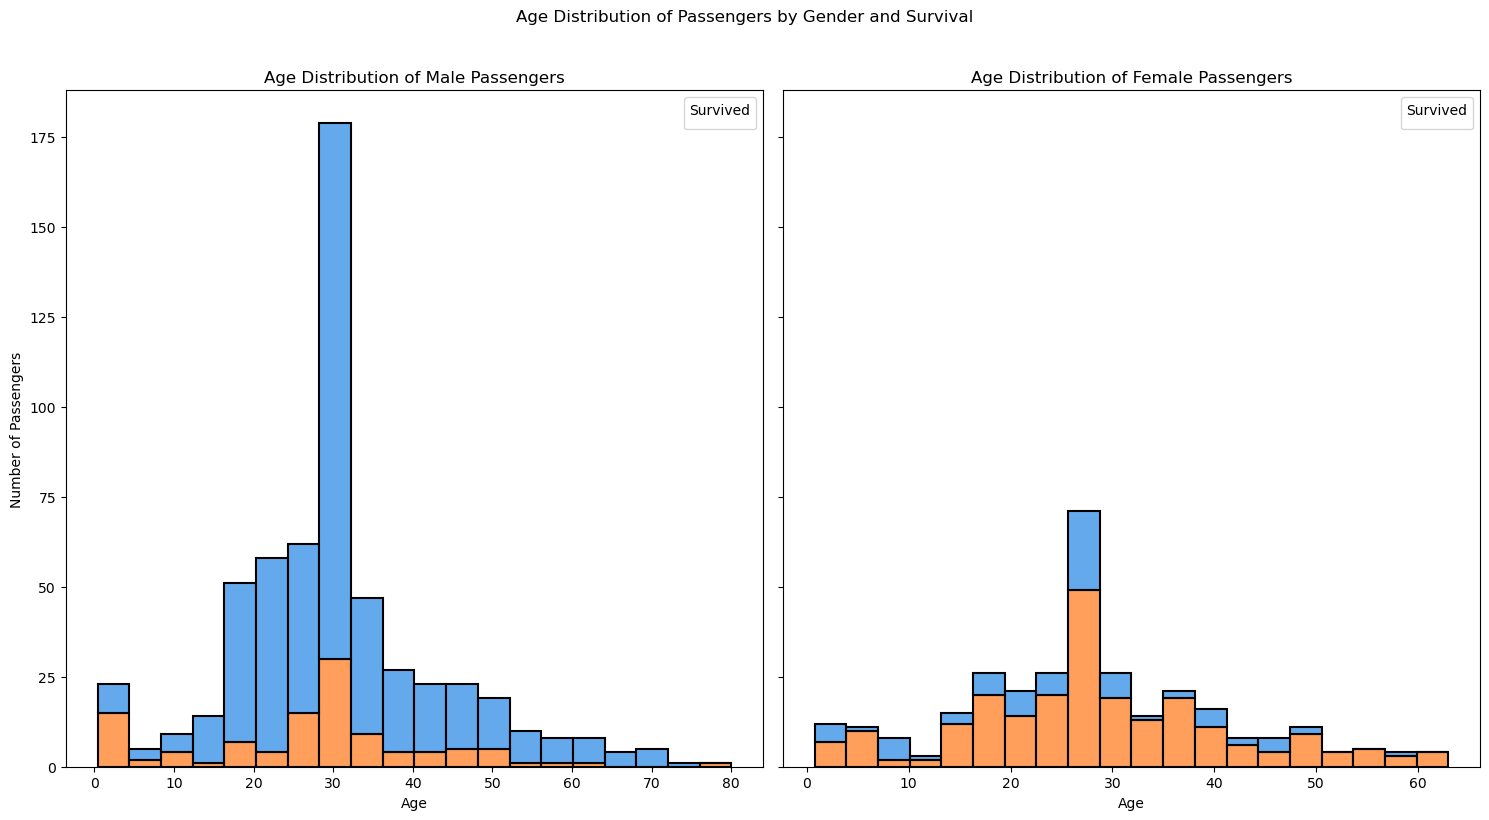

In [66]:
#10
# Choosing the colors for Survivors 
palette = {1: '#ff7f24', 0: '#318ce7'}

# Create the Chart
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Graphic representation for each gender
for i, (sex, ax) in enumerate(zip(df['Sex'].unique(), axes)):
    sns.histplot(data=df[df['Sex'] == sex], x='Age', hue='Survived', multiple='stack', palette=palette, edgecolor='black', linewidth=1.5, bins=20, ax=ax)
    ax.set_title(f'Age Distribution of {sex.capitalize()} Passengers')
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of Passengers')
    ax.legend(title='Survived', loc='upper right')

# Chart title
fig.suptitle('Age Distribution of Passengers by Gender and Survival', y=1.02)
plt.tight_layout()
plt.show()

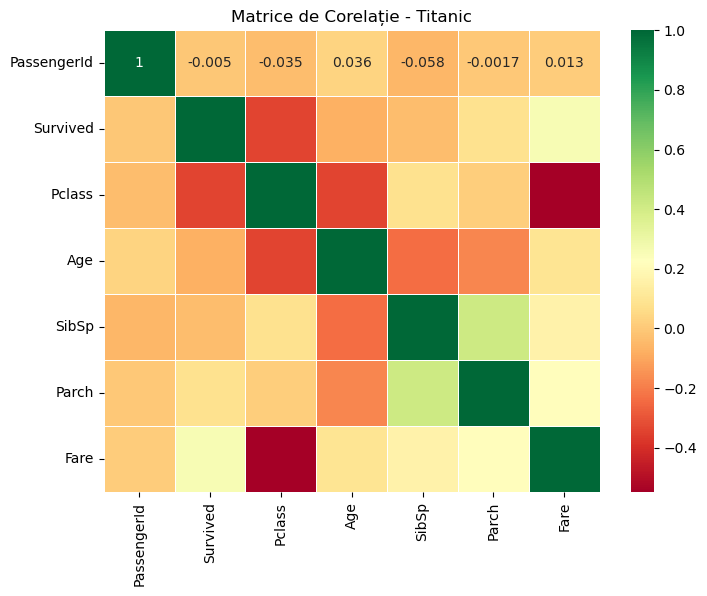

In [20]:
#11
# Relevent numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_mtx = numeric_columns.corr()

# Creating a heatmap graph
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mtx, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Matrice de Corelație - Titanic')
plt.show()
# Observatii: Valori apropiate de 0 -nu există o corelație semnificativă între variabile.

####  12.1 What is the distribution of survival by class and gender?
We will look to see if there are significant differences in survival rates between different social classes and also between men and women.

**Answer:** If we group passengers by class and gender, we can see if there are any notable patterns. For example, perhaps women in First Class had a higher survival rate than men in Third Class.

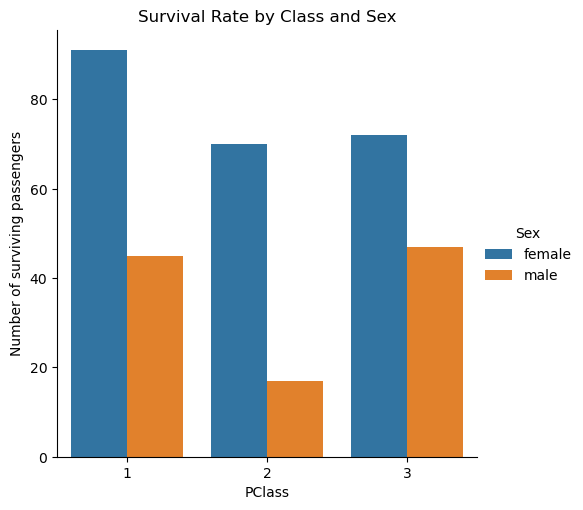

In [21]:
#12.1
# Survivors (Survived = 1)
survived_mask = df['Survived'] == 1
survived_passengers = df[survived_mask]

# Graph to compare the survival rate by class and gender
sns.catplot(x='Pclass', hue='Sex', kind='count', data=survived_passengers)
plt.title('Survival Rate by Class and Sex')
plt.xlabel('PClass')
plt.ylabel('Number of surviving passengers')
plt.show()

####  12.2 Is there a correlation between the price of the ticket (fare) and the chances of survival?
We checked if passengers who paid higher fares had a higher probability of survival.

**Answer:** We analyzed the distribution of fares according to survival and checked if there is a clear trend.



In [2]:
#12.2
# Calculating the average fares by class and gender
fare_by_class_sex = df.groupby(['Pclass', 'Sex'])['Fare'].mean()

print(fare_by_class_sex)

NameError: name 'df' is not defined

Checking the correlation between fares and survival:
We compared the average fares for passengers who survived with those who did not.
If there is a significant difference between these groups, we can conclude that tariffs could be a relevant factor in the chances of survival.

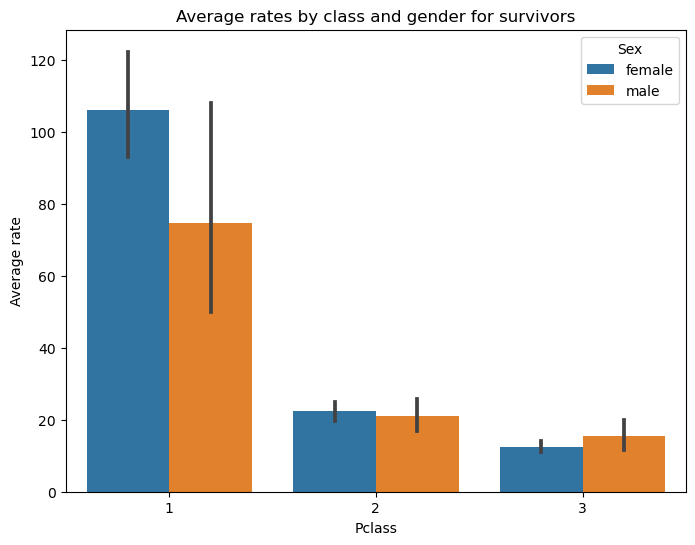

In [23]:
# Survivors (Survived = 1)
survived_passengers = df[df['Survived'] == 1]

# Graph comparing average fares by class and gender.
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Fare', hue='Sex', data=survived_passengers)
plt.xlabel('Pclass')
plt.ylabel('Average rate')
plt.title('Average rates by class and gender for survivors')
plt.show()

####  12.3 Did the age of the passengers influence the survival rate ?
We can group survivors by age ranges (e.g., under 18 years, 18-30 years, 30-50 years, etc.) and analyze the survival percentage in each group.

**Chart:** to visualize the age distribution of passengers and determine any correlation between age and survival chances.



C:\Users\Asus\AppData\Local\Temp\ipykernel_12296\1520128098.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


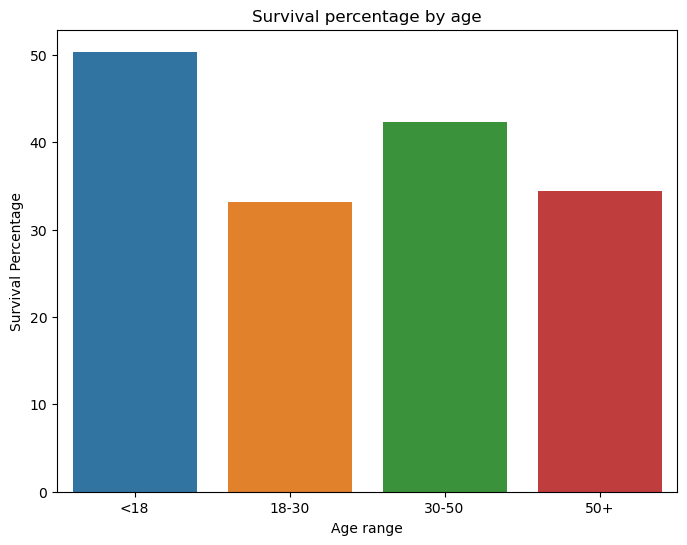

In [24]:
12.3
# Groupin the passengers into age intervals
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '50+'])

# Calculating the survival percentage for each group
survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100

# Chart to visualize the survival percentage by age
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_age_group.index, y=survival_rate_by_age_group.values)
plt.xlabel('Age range')
plt.ylabel('Survival Percentage')
plt.title('Survival percentage by age')
plt.show()